# House Loan Data Analysis Project

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging. Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

Steps to be done:

⦁ Load the dataset that is given to you ⦁ Check for null values in the dataset ⦁ Print percentage of default to payer of the dataset for the TARGET column ⦁ Balance the dataset if the data is imbalanced ⦁ Plot the balanced data or imbalanced data ⦁ Encode the columns that is required for the model ⦁ Calculate Sensitivity as a metrice ⦁ Calculate area under receiver operating characteristics curve

### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
loan_ds = pd.read_csv('/content/loan_data.csv')
loan_ds.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target=loan_ds["TARGET"]
data=loan_ds.drop(columns=["TARGET","SK_ID_CURR"])
print(data.shape,target.shape)

(23282, 120) (23282,)


### Check for null values in the dataset

In [ ]:
def check_missing_data(df):
    missing_cols=[]
    for i in df.columns:
        percent=df[i].isnull().mean()
        if percent !=0:
            missing_cols.append(i)
    if len(missing_cols)==0:
        print('no columns with missing value')
    else:
        print('number of columns with missing value : ',len(missing_cols))
        return missing_cols

In [ ]:
check_missing_data(loan_ds)

number of columns with missing value :  103


['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENT

In [ ]:
#seperating categorical and non-categorical columns
categ_col=[x for x in data if data[x].dtype=='O']
non_categorical=data.drop(columns=categ_col)
categorical=data[categ_col]

In [ ]:
categorical

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23277,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Realty agents,WEDNESDAY,Self-employed,NaN,NaN,NaN,NaN
23278,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,FRIDAY,Self-employed,NaN,NaN,NaN,NaN
23279,Cash loans,F,N,N,Unaccompanied,Working,Incomplete higher,Married,With parents,High skill tech staff,TUESDAY,Other,reg oper account,block of flats,Panel,No
23280,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Managers,FRIDAY,Self-employed,NaN,NaN,NaN,NaN


In [ ]:
#handling missing values
#non_categorical=non_categorical.interpolate(method='linear')
def input_missing_value(df):
    try:
        for column in df.columns:
            i=df.columns.get_loc(column)
            df.iloc[:,i].fillna(df[column].mode()[0],inplace=True)
    except:
        pass

input_missing_value(categorical)
input_missing_value(non_categorical)

In [ ]:
check_missing_data(non_categorical)
check_missing_data(categorical)

no columns with missing value
no columns with missing value


### Print the percentage of default to payer of the dataset for the target column

Percentage of defaulters  92.02


<Axes: >

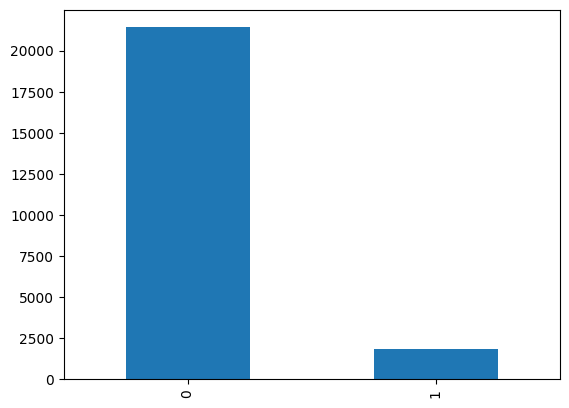

In [ ]:
#checking for percentage of defaulters and non-defaulters
defaulters=loan_ds.TARGET.value_counts()[0]
non_defaulters=loan_ds.TARGET.value_counts()[1]
fraction_of_defaulters=defaulters/(defaulters + non_defaulters)
percentage_of_defaulters = round((fraction_of_defaulters * 100),2)
print('Percentage of defaulters ', percentage_of_defaulters)
loan_ds.TARGET.value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical.columns:
    print(i)
    categorical[i]=le.fit_transform(categorical[i])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


<ipython-input-14-3d8af6a2b827>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=le.fit_transform(categorical[i])
<ipython-input-14-3d8af6a2b827>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=le.fit_transform(categorical[i])
<ipython-input-14-3d8af6a2b827>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
features=pd.concat([non_categorical,categorical],axis=1)
print(non_categorical.shape,categorical.shape)
features.shape

(23282, 104) (23282, 16)


(23282, 120)

### Handling imbalances in the dataset
Using SMOTE method

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [ ]:
X, y = sm.fit_resample(features, target)

(42848, 120) (42848,)


<Axes: >

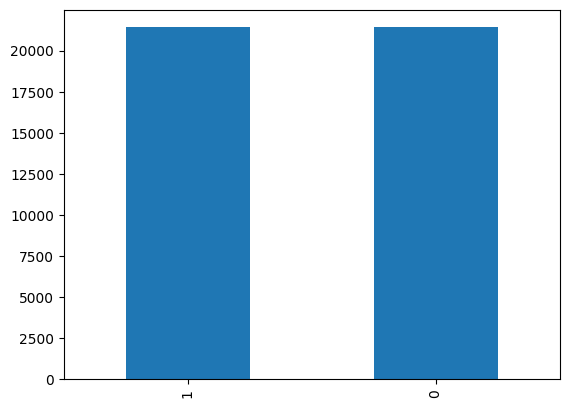

In [ ]:
print(X.shape, y.shape)
y.value_counts().plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('Train Sizes: {}, {}'.format(X_train.shape, y_train.shape))
print('Test Sizes: {}, {}'.format(X_test.shape, y_test.shape))

Train Sizes: (32136, 120), (32136,)
Test Sizes: (10712, 120), (10712,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train.shape, X_test.shape)

(32136, 120) (10712, 120)


### Building a neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape[1]

120

In [ ]:
model = Sequential([
    Dense(64,input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7744      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_history= model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
402/402 [==============================] - 8s 5ms/step - loss: 0.5838 - accuracy: 0.6914 - val_loss: 0.4829 - val_accuracy: 0.7777
Epoch 2/100
402/402 [==============================] - 2s 4ms/step - loss: 0.4906 - accuracy: 0.7706 - val_loss: 0.4483 - val_accuracy: 0.7950
Epoch 3/100
402/402 [==============================] - 2s 4ms/step - loss: 0.4621 - accuracy: 0.7863 - val_loss: 0.4227 - val_accuracy: 0.8082
Epoch 4/100
402/402 [==============================] - 2s 4ms/step - loss: 0.4401 - accuracy: 0.7975 - val_loss: 0.4013 - val_accuracy: 0.8219
Epoch 5/100
402/402 [==============================] - 3s 6ms/step - loss: 0.4205 - accuracy: 0.8078 - val_loss: 0.3863 - val_accuracy: 0.8321
Epoch 6/100
402/402 [==============================] - 2s 4ms/step - loss: 0.3991 - accuracy: 0.8190 - val_loss: 0.3636 - val_accuracy: 0.8441
Epoch 7/100
402/402 [==============================] - 2s 4ms/step - loss: 0.3880 - accuracy: 0.8250 - val_loss: 0.3517 - val_accuracy: 0.8491

In [ ]:
eval_test_data = model.evaluate(X_test, y_test)
print("Test Loss: ", eval_test_data[0])
print("Test Accuracy: ", eval_test_data[1])
accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']
loss = train_history.history['loss']

335/335 [==============================] - 1s 2ms/step - loss: 0.2128 - accuracy: 0.9130
Test Loss:  0.21282455325126648
Test Accuracy:  0.9129948019981384


<Figure size 640x480 with 0 Axes>

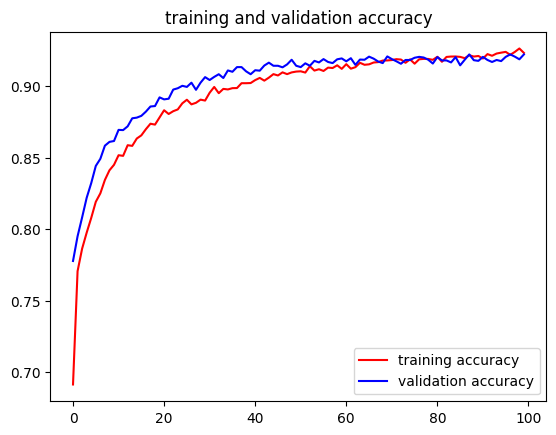

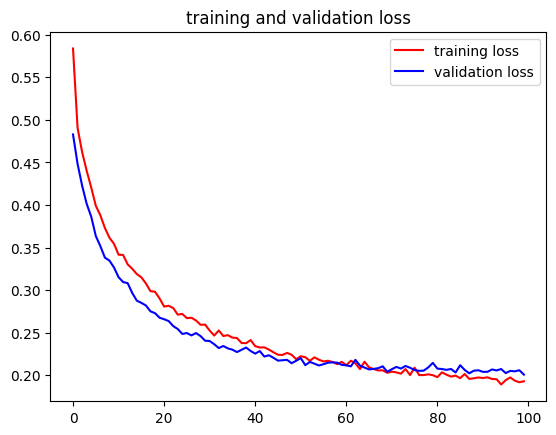

<Figure size 640x480 with 0 Axes>

In [ ]:
val_loss=train_history.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='training accuracy')
plt.plot(epochs,val_accuracy,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.figure()


### Calculating the area under receiver operating characteristics curve

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred=model.predict(X_test)
auc_score=roc_auc_score(y_test,y_pred)
print("Area under the ROC Curve: ", auc_score)

335/335 [==============================] - 1s 1ms/step
Area under the ROC Curve:  0.9737384479506073
